In [137]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [138]:
df=pd.read_csv('TSLA.csv')

In [139]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [140]:
df.info()#info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [141]:
df.describe()#statistical info about dataframe

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [142]:
df.corr()#show correlation between columns

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


In [143]:
df.isnull().sum()#to check the number of null values in each column.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [144]:
X=np.asanyarray(df[['Open','High','Low','Volume']])
Y=np.asanyarray(df[['Close']])

LINEAR REGRESSION CODE STARTS FROM HERE

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [146]:
LR=LinearRegression()

In [147]:
LR.fit(X_train,Y_train)

LinearRegression()

In [148]:
LR.coef_

array([[-6.40878154e-01,  8.44926735e-01,  7.95604389e-01,
         8.50437898e-09]])

In [149]:
LR.intercept_

array([-0.01716769])

ERROR ANALYSIS AND COMPARISONS

In [150]:
predicted=LR.predict(X_test)
print(predicted)

[[ 29.82098141]
 [235.19801605]
 [364.75096469]
 [ 24.95896776]
 [247.63924803]
 [336.91847741]
 [221.99334702]
 [204.86617192]
 [211.64377772]
 [295.2058066 ]
 [381.9556288 ]
 [ 35.02663322]
 [368.84242   ]
 [ 30.9866251 ]
 [278.98802032]
 [257.11867026]
 [ 25.88869821]
 [ 37.6930338 ]
 [180.92760813]
 [ 31.40239954]
 [252.36764517]
 [286.16430706]
 [ 32.33497185]
 [ 21.38022926]
 [ 16.89531696]
 [341.11793864]
 [232.49669023]
 [ 33.91840001]
 [291.89946029]
 [ 23.12445312]
 [ 30.3748731 ]
 [341.91726739]
 [354.16920695]
 [247.65152956]
 [ 29.62444251]
 [251.35512073]
 [203.69116428]
 [318.70071028]
 [262.01311725]
 [ 37.21289368]
 [ 34.11451288]
 [197.43867196]
 [413.37035221]
 [ 25.0032551 ]
 [ 16.71662014]
 [ 26.0445507 ]
 [ 32.18698549]
 [202.93382591]
 [189.58301006]
 [ 34.84520178]
 [253.20480736]
 [250.39587623]
 [227.13781282]
 [248.01397251]
 [336.1377739 ]
 [211.65197008]
 [245.44548176]
 [208.50291264]
 [205.85774555]
 [ 31.11838638]
 [178.53836082]
 [326.8743077 ]
 [307.16

In [151]:
df2 = pd.DataFrame(Y_test)
df2['Predicted']=predicted
df2
df2.rename(columns={0:'Actual'},inplace=True)
df2

,Actual,Predicted
0,29.940001,29.820981
1,235.839996,235.198016
2,362.750000,364.750965
3,24.740000,24.958968
4,250.029999,247.639248
...,...,...
479,231.279999,230.628011
480,27.570000,26.537104
481,200.630005,203.477830
482,34.520000,34.042849


In [152]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,predicted))

Mean Absolute Error: 1.4127118739391618
Mean Squared Error: 4.489436177407574


<AxesSubplot:>

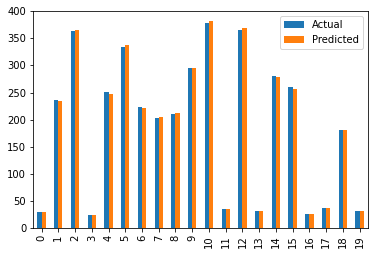

In [153]:
graph=df2.head(20)
graph.plot(kind='bar')